In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
prog = pd.read_csv("C:/Users/sneha bhattacharya/Downloads/StudentsPerformance.csv")


In [7]:
prog.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [11]:
prog.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [10]:
prog.shape #tells the number of columns and rows.

(1000, 8)

In [12]:
prog.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [37]:
prog.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [31]:
prog['gender'].unique() #gives the unique values under gender

array(['female', 'male'], dtype=object)

In [33]:
prog['parental level of education'].unique()  #gives all the unique values

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [35]:
prog['race/ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [36]:
prog['test preparation course'].unique()

array(['none', 'completed'], dtype=object)

In [14]:
prog.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [ ]:
#nunique() gives the number of unique values for each column.

In [ ]:
#Here gender lunch and test preparation course has only two unique datas but race/ethnicity and parental level of education has more values we need to see its relation with the scores to remove the redundant groups.

In [18]:
prog.isnull()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False


In [19]:
#here isnull() gives all the values false hence do not need to drop any column or row.

In [16]:
prog.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [ ]:
# since no null values are present hence the sum comes out to be zero.

In [ ]:
# Also we donot see any noticeable outliers to deal with.

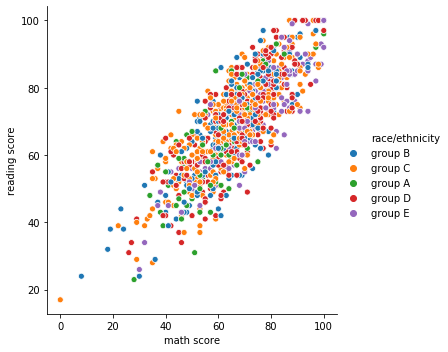

In [23]:
sns.relplot(x='math score' , y='reading score', hue='race/ethnicity', data=prog)

In [ ]:
#ALmost all the groups in race/ethnicity have variation in maths and reading score without any significant insight.

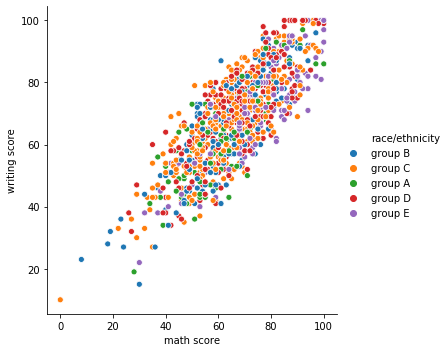

In [25]:
sns.relplot(x='math score' , y='writing score', hue='race/ethnicity', data=prog)

In [ ]:
#NO significant insight.

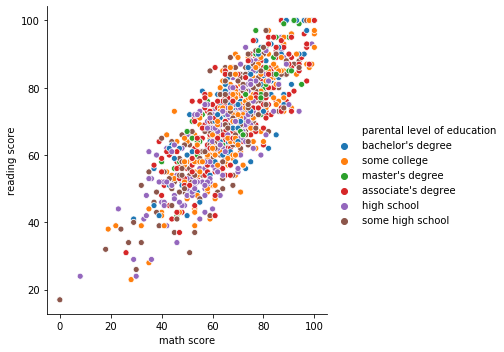

In [26]:
sns.relplot(x='math score' , y='reading score', hue='parental level of education', data=prog)

In [ ]:
#Again for parental level of education we don't see any significant insight.

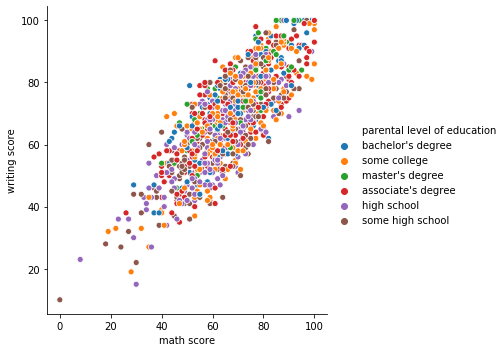

In [27]:
sns.relplot(x='math score' , y='writing score', hue='parental level of education', data=prog)

In [ ]:
#In the next step we remove redundant groups. That is the groups that are not giving any valuable insight or are not affecting the maths,reading and writing score much.

In [17]:
Student = prog.drop(['race/ethnicity','parental level of education'] , axis=1)

In [ ]:
#we are dropping race/ethnicity and parental level of education.

In [37]:
Student.head()

,gender,lunch,test preparation course,math score,reading score,writing score
0,female,standard,none,72,72,74
1,female,standard,completed,69,90,88
2,female,standard,none,90,95,93
3,male,free/reduced,none,47,57,44
4,male,standard,none,76,78,75


In [38]:
cor = Student.corr()

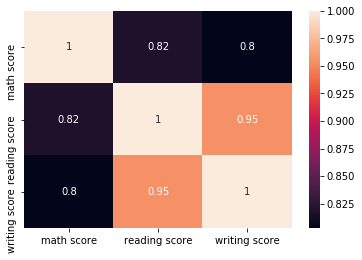

In [39]:
sns.heatmap(cor, xticklabels=cor.columns, yticklabels=cor.columns,annot=True)

In [ ]:
#In the above heatmap we see for example variation of the scores and corelation of the scores are almost same.

In [ ]:
# Since we have a lot of categorical values and not much integer values so, it is not that defining.

In [ ]:
#We donot see any clear positive or negative correlation hence we look for some other method.

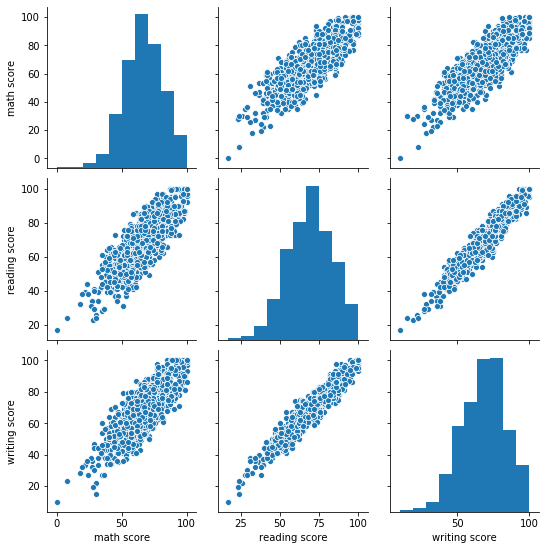

In [40]:
sns.pairplot(Student)

In [ ]:
#We cannot reduce the above in some significant insight. we try out some other.

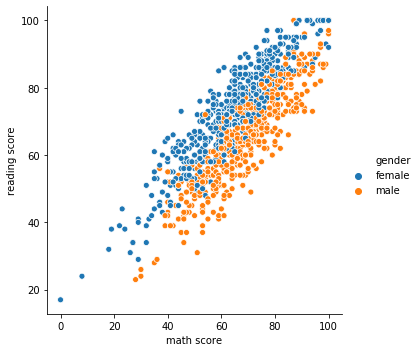

In [41]:
sns.relplot(x='math score' , y='reading score', hue='gender', data=Student)

In [ ]:
# Here we see that males are having relatively better marks in maths than females while the reading score is higher for females compared to males.

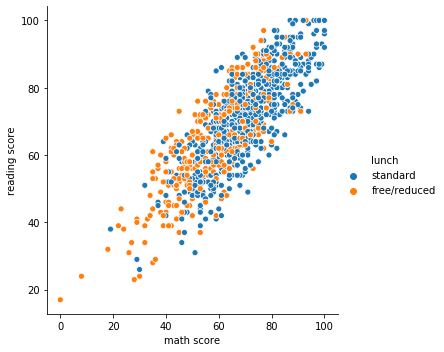

In [20]:
sns.relplot(x='math score' , y='reading score', hue='lunch', data=Student)

In [ ]:
# Here we see that the students with free/reduced lunch is having quite low reading and math score while standard lunch students have a good math and reading score.

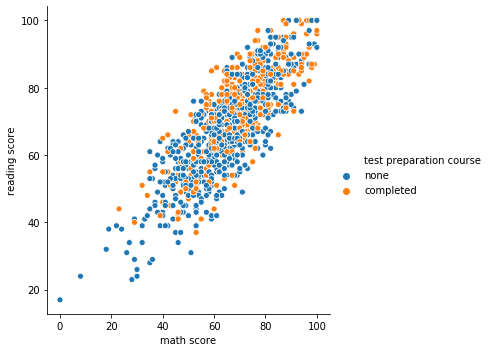

In [21]:
sns.relplot(x='math score' , y='reading score', hue='test preparation course', data=Student)

In [ ]:
# one with no test preparation course have lower math and reading score than the one who have completed certain course.

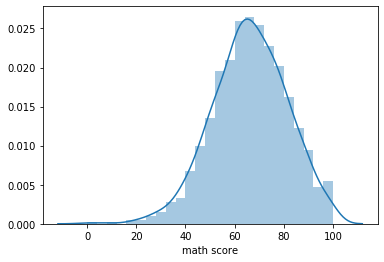

In [42]:
sns.distplot(Student['math score'])

In [ ]:
#The highest number is between aroung 60 to 80 hence most students are getting between this range

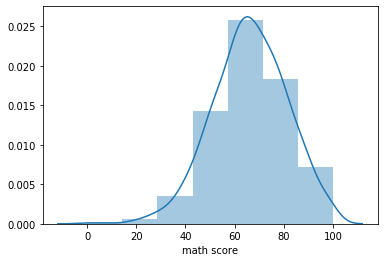

In [28]:
sns.distplot(Student['math score'] , bins=7)

In [ ]:
#This time bin is made 7 to visualize it clearly.

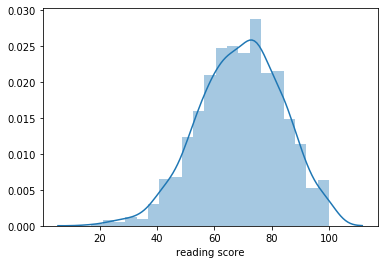

In [43]:
sns.distplot(Student['reading score'])

In [ ]:
#Most number of students have got reading score between around 60 to 80 but highest is between 70 to 75.

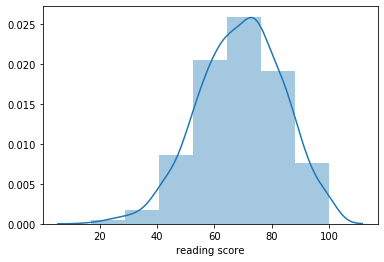

In [29]:
sns.distplot(Student['reading score'], bins=7)

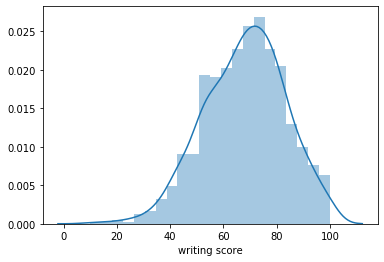

In [44]:
sns.distplot(Student['writing score'])

In [ ]:
#In writing score the highest lies in almost the same range of 60 to 80.

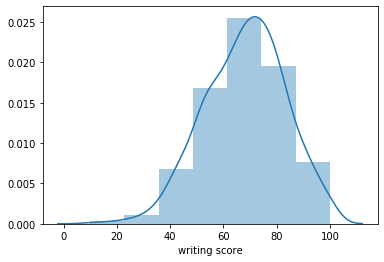

In [30]:
sns.distplot(Student['writing score'],bins=7)

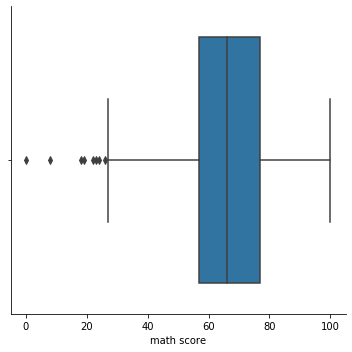

In [47]:
sns.catplot(x='math score',kind='box',data=Student)

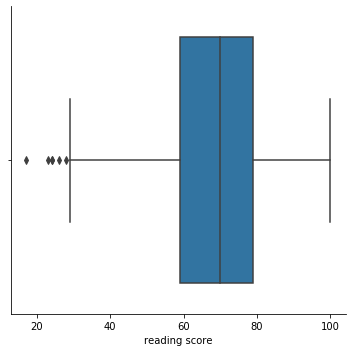

In [48]:
sns.catplot(x='reading score',kind='box',data=Student)

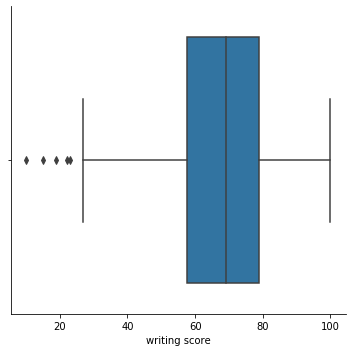

In [49]:
sns.catplot(x='writing score',kind='box',data=Student)

In [ ]:
#The cataplot also tells us where the scores lies i.e. what is the range where higest marks is being obtained.